In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import os
from tpot import TPOTRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import *
from sklearn.svm import *
import re
import math

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [3]:
data = pd.read_csv('../raw_data/data_final_indé_medium2.csv')
data

,best_topic,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,developer,publisher,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio,nb_review,sells_per_days,nb_game_by_publisher,nb_game_by_dev,indé,0,1,2,3,4,followers,mode
0,topic_11,16900,GROUND BRANCH,early_access tactical action fps military,0.016274,0.016274,0.016274,0.016274,0.178791,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.528276,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,1,15.49,260.0,BlackFoot Studios,BlackFoot Studios,1,1,50000.0,9,0.807278,742,192.307692,2,1,0,0.0,1.0,0.0,0.0,0.0,45908,0.029598
1,topic_16,45420,Land It!,casual simulation relaxing realistic real_time...,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.704338,0.015561,0.015561,0.015561,1,6.99,1003.0,Nemesys Games,Nemesys Games,1,0,2138.0,2,0.909091,11,2.131605,4,4,0,0.0,0.0,0.0,1.0,0.0,138,0.043968
2,topic_2,116100,Super Toy Cars,racing multiplayer local_multiplayer arcade 1980s,0.015774,0.015774,0.492073,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.223992,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,1,6.99,1790.0,Eclipse Games,Eclipse Games,1,1,34319.0,2,0.603604,333,19.172626,3,4,0,0.0,0.0,0.0,1.0,0.0,510,0.051236
3,topic_6,200150,Battle Chess: Game of Kings™,strategy chess casual board_game puzzle_platfo...,0.180916,0.016457,0.016457,0.016457,0.016457,0.016457,0.272457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.266852,0.016457,0.016457,1,22.99,1237.0,Olde Sküül;Sculptured Software,Interplay Entertainment Corp.,1,1,20000.0,7,0.460784,204,16.168149,21,1,1,0.0,1.0,0.0,0.0,0.0,0,0.041803
4,topic_18,205090,BIT.TRIP FLUX,action casual rhythm great_soundtrack pixel_gr...,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.687933,0.016425,1,6.99,1791.0,Gaijin Games,Gaijin Games,1,1,25719.0,5,0.533835,133,14.360134,7,7,0,0.0,0.0,0.0,1.0,0.0,166,0.049451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19244,topic_5,1050210,The Superlatives: Shattered Worlds,adventure rpg text_based realistic real_time_w...,0.016397,0.016397,0.016397,0.016397,0.016397,0.445722,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.259137,0.016397,0.016397,0.016397,1,4.79,34.0,Choice of Games,Choice of Games,1,1,474.0,0,0.666667,3,13.941176,94,94,0,0.0,0.0,0.0,0.0,1.0,69,0.069624
19245,topic_19,1050230,Dodge Bubble,casual action 1980s relaxing realistic,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.705831,1,0.79,34.0,HaDe,HaDe,1,0,4426.0,2,0.954545,22,130.176471,3,1,0,0.0,1.0,0.0,0.0,0.0,1070,0.088549
19246,topic_8,1050240,MiniGolf,casual mini_golf golf mouse_only relaxing,0.016701,0.016701,0.211801,0.016701,0.016701,0.016701,0.016701,0.016701,0.261572,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.242709,0.016701,1,2.99,33.0,Meridian93 Studio,HH-Games,1,0,890.0,5,0.400000,5,26.969697,29,1,1,0.0,1.0,0.0,0.0,0.0,138,0.019909
19247,topic_12,1050470,VR health care (aerobic exercise): VR sport an...,sports casual vr vr_only 1980s,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.502025,0.016183,0.016183,0.206678,0.016183,0.016183,0.016183,0.016183,1,13.49,33.0,Thoth Technology Ltd.,Thoth Technology Lt

In [4]:
#data.name = data.name.str.replace(r'[^\x00-\x7F]+', 'Nan')
#data = data[data.name != 'Nan']

In [5]:
data.columns

Index(['best_topic', 'steam_appid', 'name', 'top_5_tags', 'topic_0', 'topic_1',
       'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7',
       'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13',
       'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19',
       'english', 'price', 'days_on_steam', 'developer', 'publisher',
       'is_a_remake', 'has_a_website', 'owner_estimated', 'score_descriptif',
       'ratio', 'nb_review', 'sells_per_days', 'nb_game_by_publisher',
       'nb_game_by_dev', 'indé', '0', '1', '2', '3', '4', 'followers', 'mode'],
      dtype='object')

In [6]:
youtube = pd.read_csv('../raw_data/full_youtube.csv')

In [7]:
youtube = youtube.rename(columns={'id': 'steam_appid'})
data = data.merge(youtube,  on='steam_appid', how='inner')

In [8]:
condition = lambda x: 1 if x > 1 else 0

In [9]:
data.views = data.views.apply(condition)
data.comments = data.comments.apply(condition)

In [10]:
data

,best_topic,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,developer,publisher,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio,nb_review,sells_per_days,nb_game_by_publisher,nb_game_by_dev,indé,0,1,2,3,4,followers,mode,views,comments
0,topic_11,16900,GROUND BRANCH,early_access tactical action fps military,0.016274,0.016274,0.016274,0.016274,0.178791,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.528276,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,1,15.49,260.0,BlackFoot Studios,BlackFoot Studios,1,1,50000.0,9,0.807278,742,192.307692,2,1,0,0.0,1.0,0.0,0.0,0.0,45908,0.029598,1,1
1,topic_16,45420,Land It!,casual simulation relaxing realistic real_time...,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.704338,0.015561,0.015561,0.015561,1,6.99,1003.0,Nemesys Games,Nemesys Games,1,0,2138.0,2,0.909091,11,2.131605,4,4,0,0.0,0.0,0.0,1.0,0.0,138,0.043968,1,1
2,topic_2,116100,Super Toy Cars,racing multiplayer local_multiplayer arcade 1980s,0.015774,0.015774,0.492073,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.223992,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,1,6.99,1790.0,Eclipse Games,Eclipse Games,1,1,34319.0,2,0.603604,333,19.172626,3,4,0,0.0,0.0,0.0,1.0,0.0,510,0.051236,1,1
3,topic_6,200150,Battle Chess: Game of Kings™,strategy chess casual board_game puzzle_platfo...,0.180916,0.016457,0.016457,0.016457,0.016457,0.016457,0.272457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.266852,0.016457,0.016457,1,22.99,1237.0,Olde Sküül;Sculptured Software,Interplay Entertainment Corp.,1,1,20000.0,7,0.460784,204,16.168149,21,1,1,0.0,1.0,0.0,0.0,0.0,0,0.041803,1,1
4,topic_18,205090,BIT.TRIP FLUX,action casual rhythm great_soundtrack pixel_gr...,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.687933,0.016425,1,6.99,1791.0,Gaijin Games,Gaijin Games,1,1,25719.0,5,0.533835,133,14.360134,7,7,0,0.0,0.0,0.0,1.0,0.0,166,0.049451,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19244,topic_5,1050210,The Superlatives: Shattered Worlds,adventure rpg text_based realistic real_time_w...,0.016397,0.016397,0.016397,0.016397,0.016397,0.445722,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.259137,0.016397,0.016397,0.016397,1,4.79,34.0,Choice of Games,Choice of Games,1,1,474.0,0,0.666667,3,13.941176,94,94,0,0.0,0.0,0.0,0.0,1.0,69,0.069624,0,0
19245,topic_19,1050230,Dodge Bubble,casual action 1980s relaxing realistic,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.705831,1,0.79,34.0,HaDe,HaDe,1,0,4426.0,2,0.954545,22,130.176471,3,1,0,0.0,1.0,0.0,0.0,0.0,1070,0.088549,0,0
19246,topic_8,1050240,MiniGolf,casual mini_golf golf mouse_only relaxing,0.016701,0.016701,0.211801,0.016701,0.016701,0.016701,0.016701,0.016701,0.261572,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.242709,0.016701,1,2.99,33.0,Meridian93 Studio,HH-Games,1,0,890.0,5,0.400000,5,26.969697,29,1,1,0.0,1.0,0.0,0.0,0.0,138,0.019909,1,1
19247,topic_12,1050470,VR health care (aerobic exercise): VR sport an...,sports casual vr vr_only 1980s,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.502025,0.016183,0.016183,0.206678,0.016183,0.016183,0.016183,0.016183

In [11]:
X = data.drop(columns=['best_topic','steam_appid', 'name','top_5_tags', 'developer', 'publisher', 'owner_estimated', 'ratio', 'nb_review', 'sells_per_days', 'is_a_remake', '0', '1', '2', '3', '4', 'nb_game_by_publisher', 'indé'])
y = data['owner_estimated']

In [12]:
X.dtypes

topic_0             float64
topic_1             float64
topic_2             float64
topic_3             float64
topic_4             float64
topic_5             float64
topic_6             float64
topic_7             float64
topic_8             float64
topic_9             float64
topic_10            float64
topic_11            float64
topic_12            float64
topic_13            float64
topic_14            float64
topic_15            float64
topic_16            float64
topic_17            float64
topic_18            float64
topic_19            float64
english               int64
price               float64
days_on_steam       float64
has_a_website         int64
score_descriptif      int64
nb_game_by_dev        int64
followers             int64
mode                float64
views                 int64
comments              int64
dtype: object

In [13]:
X.shape

(19249, 30)

In [14]:
y.shape

(19249,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

# RandomForestRegressor

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[-0.29973339, -0.25883237, -0.25918235, ..., -0.61822707,
        -0.53920002, -0.41480097],
       [-0.29438066, -0.25171594, -0.25273916, ..., -0.04013379,
        -0.53920002, -0.41480097],
       [-0.29950827, -0.25853307, -0.25891137, ..., -0.61822707,
         1.85459934, -0.41480097],
       ...,
       [ 3.42537972, -0.26002116, -0.26025868, ...,  1.3843214 ,
        -0.53920002, -0.41480097],
       [-0.29600303, -0.25387288, -0.25469204, ..., -1.07020143,
         1.85459934,  2.41079473],
       [ 4.62228702, -0.25581159, -0.25644735, ...,  0.05339977,
        -0.53920002, -0.41480097]])

In [20]:
forest = RandomForestRegressor(
                               bootstrap=True, 
                               max_features=0.4, 
                               min_samples_leaf=14, 
                               n_estimators=100,
                               min_samples_split=14)
model = forest

model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.4, min_samples_leaf=14,
                      min_samples_split=14)

In [21]:
cv_results = cross_validate(model, X_test, y_test, cv=10)

In [22]:
cv_results['test_score']


array([0.64804812, 0.62004997, 0.60351875, 0.53273619, 0.65212171,
       0.59850644, 0.65208044, 0.59409064, 0.63236478, 0.66066057])

In [23]:
cv_results['test_score'].mean()

0.619417761629536

(array([2005., 1332.,  764.,  588.,  408.,  345.,  162.,   86.,   65.,
          19.]),
 array([    0.,  4000.,  8000., 12000., 16000., 20000., 24000., 28000.,
        32000., 36000., 40000.]),
 <BarContainer object of 10 artists>)

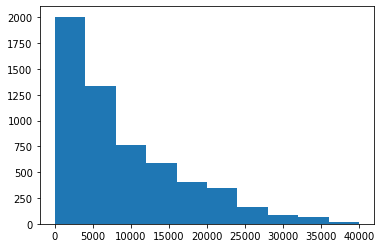

In [24]:
plt.hist(model.predict(X_test), range=(0, 40000))

(array([2713.,  972.,  414.,  262.,  153.,  784.,  144.,  105.,   65.,
          45.]),
 array([    0.,  4000.,  8000., 12000., 16000., 20000., 24000., 28000.,
        32000., 36000., 40000.]),
 <BarContainer object of 10 artists>)

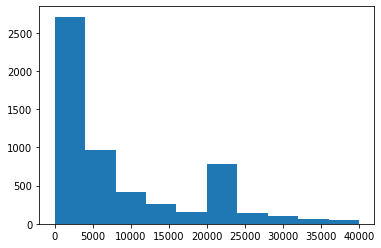

In [25]:
plt.hist(y_test, range=(0, 40000))

In [26]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

ridge = Ridge(alpha=0.2).fit(X_train, y_train)
lasso = Lasso(alpha=0.2).fit(X_train, y_train)

coefs = pd.DataFrame({
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X.columns)})\

coefs\
    .applymap(lambda x: int(x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.942e+10, tolerance: 1.497e+08
  model = cd_fast.enet_coordinate_descent(


,coef_ridge,coef_lasso
topic_0,246,277
topic_1,-15,7
topic_2,46,72
topic_3,778,807
topic_4,626,648
topic_5,-392,-360
topic_6,473,494
topic_7,-70,-43
topic_8,-327,-302
topic_9,485,512


In [27]:
# Preprocessor (prepare the dataset)
num_transformer = make_pipeline(SimpleImputer(), StandardScaler())
cat_transformer = OneHotEncoder()

preproc = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=['float64'])),
    (cat_transformer, make_column_selector(dtype_include=['object','bool'])),
    remainder='passthrough')

In [28]:
pipe = make_pipeline(preproc, RandomForestRegressor(bootstrap=True, 
                               max_features=0.4, 
                               min_samples_leaf=14, 
                               n_estimators=100,
                               min_samples_split=14))

In [29]:
X_train = pd.DataFrame(X_train)

In [30]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f6098cd00>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f6098c130>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_feat

In [31]:
pipe.score(X_test,y_test)

0.6358835578887798

In [32]:
_ = pipe.predict(X_test)